# Pension Credit

[Pension Credit](https://www.gov.uk/pension-credit) is the main means-tested benefit (outside of the State Pension) for individuals over State Pension Age (seniors cannot claim legacy benefits or Universal Credit). It has two main components:

* Guarantee Credit: a benefit that increases a claimant's income up to the 'minimum guarantee' income (causing a 100% marginal tax rate).
* Savings Credit: a trapezoidal benefit that rewards income (created to alleviate part of the 100% marginal rate in Guarantee Credit).

The main legislation for Pension Credit is:

* [The State Pension Act 2002](https://www.legislation.gov.uk/ukpga/2002/16/contents): sets out the structure of Pension Credit and some major rules.
* [The State Pension Regulations 2002](https://www.legislation.gov.uk/uksi/2002/1792/contents): defines the specific rules (rates, income sources). This is amended each year in order to uprate the benefit payment levels with inflation.

You can see how these components interact below:

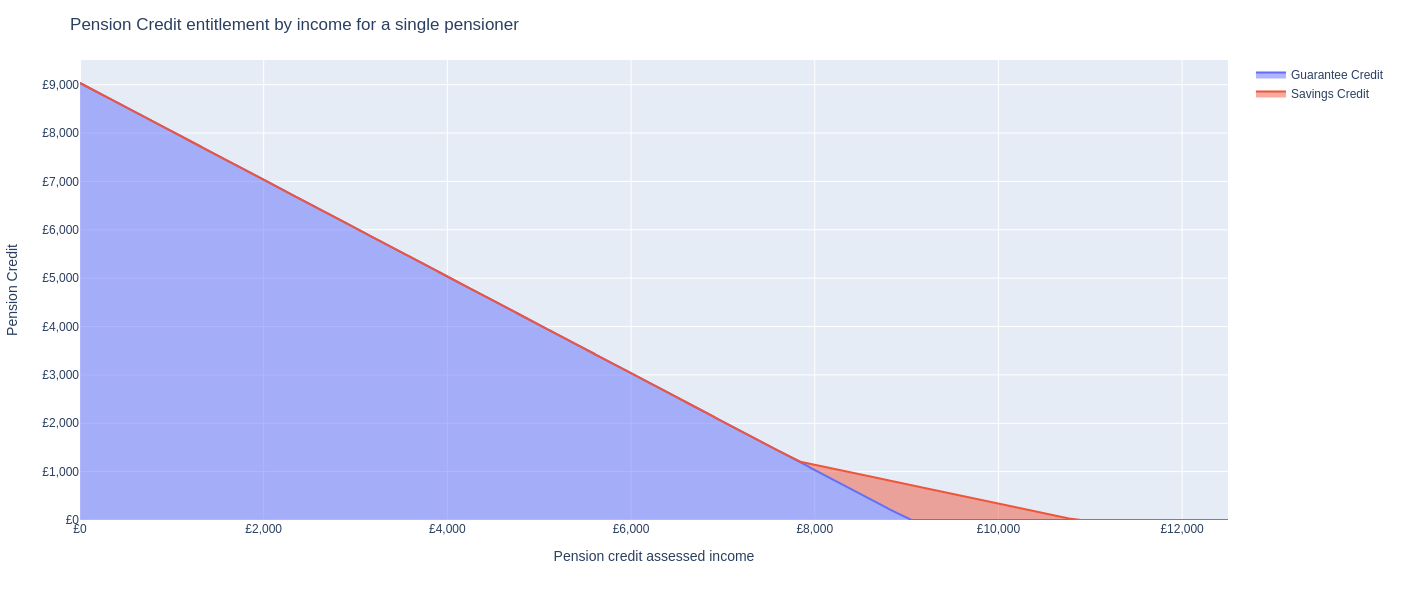

In [30]:
from openfisca_uk import IndividualSim

sim = IndividualSim()

sim.add_person(age=70)

sim.vary("pension_credit_income", min=0, max=12_500, step=1)

import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    "Assessed income": sim.calc("pension_credit_income")[0],
    "Guarantee Credit": sim.calc("guarantee_credit")[0],
    "Savings Credit": sim.calc("savings_credit")[0],
})

px.area(
    df,
    x="Assessed income",
    y=[
        "Guarantee Credit",
        "Savings Credit",
    ],
).update_layout(
    title="Pension Credit entitlement by income for a single pensioner",
    yaxis_title="Pension Credit",
    yaxis_tickformat=",",
    yaxis_tickprefix="£",
    xaxis_title="Pension credit assessed income",
    xaxis_tickformat=",",
    xaxis_tickprefix="£",
    height=600,
    width=800,
    legend_title="",
)

We can also visualise the marginal tax rate imposed by Pension Credit. Guarantee Credit has a single 100% marginal tax rate: every pound a pensioner gains in income, they lose from their Guarantee Credit entitlement. Savings Credit has a negative (-60%) MTR initially, rewarding each marginal pound with a 60p bonus. After the Minimum Guarantee is reached, this changes to a phase-out, withdrawing 40p for every additional pound of income. This results in the following marginal tax rate schedule: 100% up to the Savings Credit threshold, then 40% up to the Minimum Guarantee and continuing until Savings Credit is reduced to nil.

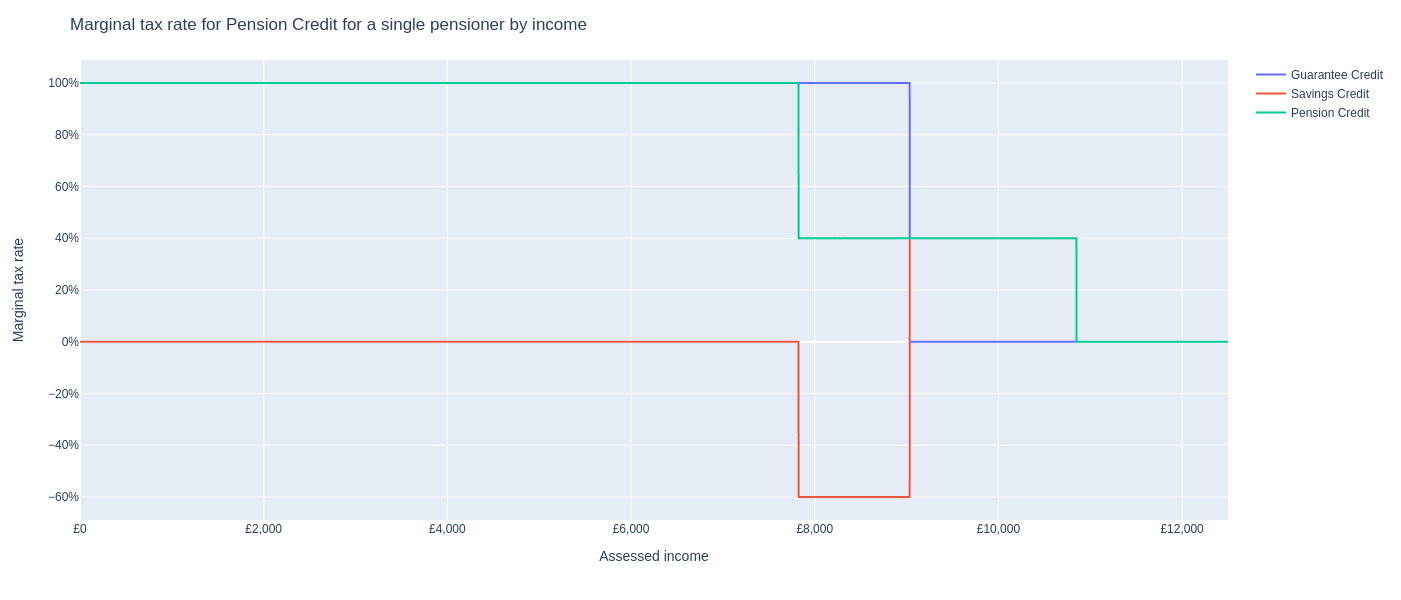

In [40]:
mtr_df = pd.DataFrame({
    "Assessed income": sim.calc("pension_credit_income")[0],
    "Guarantee Credit": -sim.deriv("guarantee_credit", wrt="pension_credit_income"),
    "Savings Credit": -sim.deriv("savings_credit", wrt="pension_credit_income"),
    "Pension Credit": -sim.deriv("pension_credit", wrt="pension_credit_income"),
})

px.line(mtr_df, y=["Guarantee Credit", "Savings Credit", "Pension Credit"], x="Assessed income").update_layout(
    title="Marginal tax rate for Pension Credit for a single pensioner by income",
    yaxis_tickformat=".0%",
    xaxis_tickformat=",",
    xaxis_tickprefix="£",
    yaxis_title="Marginal tax rate",
    height=600,
    width=800,
    legend_title="",
)